NAME   : MUKESH JAIKUMAR R.N

ROLL.NO: 225229119

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # visualization library
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df_bottle = pd.read_csv('bottle.csv')
df_cast = pd.read_csv('cast.csv')
df_bottle.head(2)

C:\Users\Nataraj\AppData\Local\Temp\ipykernel_7028\3664931153.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bottle = pd.read_csv('bottle.csv')
C:\Users\Nataraj\AppData\Local\Temp\ipykernel_7028\3664931153.py:2: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cast = pd.read_csv('cast.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To begin, let's obtain a basic description of the data. This will provide us with a simple and straightforward way to gain initial insights into the data, as well as a basic understanding of its characteristics.

One way to accomplish this is by using the describe() function in Python, which returns various summary statistics of the data, excluding NaN values. This function can give us an idea of the mean, standard deviation, minimum, maximum, and quartiles of the data, allowing us to get a sense of the distribution of the data.

In [3]:
df_bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


Checking & Cleaning dataframe for NA-values

In [4]:
df_bottle.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

We can see from the data above alot of missing values therefore we should address this issue:

Columns with more than 80% NA-values will be dropped. The dropna-method needs an integer as threshold. This threshold is calculated in the following cell.

In [5]:
df_bottle.shape # we start with data of 46 columns

(864863, 74)

In [6]:
min_count =  int(df_bottle.shape[0]*0.8)

df_bottle.dropna(axis=1, thresh= min_count, inplace= True)
df_bottle.shape

(864863, 26)

In [7]:
df_bottle.info() # 16 columns remain after this condition.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Cst_Cnt     864863 non-null  int64  
 1   Btl_Cnt     864863 non-null  int64  
 2   Sta_ID      864863 non-null  object 
 3   Depth_ID    864863 non-null  object 
 4   Depthm      864863 non-null  int64  
 5   T_degC      853900 non-null  float64
 6   Salnty      817509 non-null  float64
 7   O2ml_L      696201 non-null  float64
 8   STheta      812174 non-null  float64
 9   RecInd      864863 non-null  int64  
 10  T_prec      853900 non-null  float64
 11  S_prec      817509 non-null  float64
 12  NH3q        808299 non-null  float64
 13  C14A1q      848605 non-null  float64
 14  C14A2q      848623 non-null  float64
 15  DarkAq      840440 non-null  float64
 16  MeanAq      840439 non-null  float64
 17  R_Depth     864863 non-null  float64
 18  R_TEMP      853900 non-null  float64
 19  R_

### Removing Categorial variables
All columns that are "object" type or with less than 30 unique values are considered as categorical variables and will be removed.

In [8]:
obj_var = df_bottle.select_dtypes(include='object').columns
cat_var = []
for variable in df_bottle.columns:
    if df_bottle[variable].nunique() < 30:
        cat_var.append(variable)

cat_var.extend(obj_var)

In [9]:
df_bottle.drop(cat_var, axis= 1, inplace= True)
df_bottle.info() # no categorial variables found after the first condition

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Cst_Cnt     864863 non-null  int64  
 1   Btl_Cnt     864863 non-null  int64  
 2   Depthm      864863 non-null  int64  
 3   T_degC      853900 non-null  float64
 4   Salnty      817509 non-null  float64
 5   O2ml_L      696201 non-null  float64
 6   STheta      812174 non-null  float64
 7   R_Depth     864863 non-null  float64
 8   R_TEMP      853900 non-null  float64
 9   R_POTEMP    818816 non-null  float64
 10  R_SALINITY  817509 non-null  float64
 11  R_SIGMA     812007 non-null  float64
 12  R_SVA       812092 non-null  float64
 13  R_DYNHT     818206 non-null  float64
 14  R_O2        696201 non-null  float64
 15  R_PRES      864863 non-null  int64  
dtypes: float64(12), int64(4)
memory usage: 105.6 MB


### Removing Non-Relevant Data
In addition to addressing missing values, it is also essential to eliminate columns that are not relevant to the analysis. Based on the field description of the CalCOFI dataset, it has been determined that the columns "Cst_Cnt" and "Bsl_Cnt" do not hold any significant value. As a result, these columns will be manually removed from the data.

In [10]:
df_bottle.drop(['Cst_Cnt', 'Btl_Cnt'], axis= 1, inplace= True)

### Removing Duplicate Columns
In addition to removing non-relevant columns, it is also necessary to eliminate duplicates. The CalCOFI dataset includes of the following columns: "R_TEMP", "R_POTEMP", "R_SALINITY", "R_O2", "R_DYNHT", "R_SIGMA", "R_SVA", and "R_Depth", all under the "Reported" category. These columns will be manually dropped to ensure the accuracy and integrity of the analysis.

In [11]:
df_bottle.drop(['R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_O2', 'R_DYNHT', 'R_SIGMA', 'R_SVA', 'R_Depth'], axis= 1, inplace= True)

### Handling Missing Values
Due to the high number of available row-entries, all rows with missing interesting variables (T_degC, Salnty) will be dropped.

In [12]:
df_bottle.isnull().sum()

Depthm         0
T_degC     10963
Salnty     47354
O2ml_L    168662
STheta     52689
R_PRES         0
dtype: int64

In [13]:
df_bottle = df_bottle[df_bottle['T_degC'].notna()]
df_bottle = df_bottle[df_bottle['Salnty'].notna()]
df_bottle.isnull().sum()

Depthm         0
T_degC         0
Salnty         0
O2ml_L    152758
STheta      2073
R_PRES         0
dtype: int64

In [14]:
non_empty_data_cnt = ((df_bottle.shape[0]-df_bottle['O2ml_L'].isnull().sum()) / df_bottle.shape[0])*100

#### After conducting the calculation, it has been determined that removing all the row-entries with missing "O2ml_L" values would result in retaining 81.2% of the original data. Alternatively, missing values could be filled with the mean values to create a complete dataset. However, due to the large number of available row-entries, it has been decided to drop all missing "O2ml_L" rows for this analysis.

A similar approach is taken with the "STheta" column. After evaluating the impact of removing this column, it has been determined that the effect is negligible.

In [15]:
df_bottle = df_bottle[df_bottle['O2ml_L'].notna()]
df_bottle = df_bottle[df_bottle['STheta'].notna()]
df_bottle.isnull().sum()

Depthm    0
T_degC    0
Salnty    0
O2ml_L    0
STheta    0
R_PRES    0
dtype: int64

In [16]:
df_bottle.shape

(661268, 6)

### Data Visualization

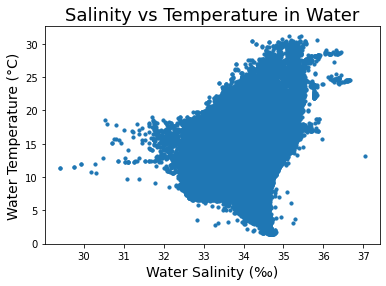

In [17]:
plt.scatter(df_bottle["Salnty"], df_bottle["T_degC"],s=10)
plt.xlabel('Water Salinity (‰)',fontsize=14)
plt.ylabel('Water Temperature (°C)',fontsize=14)
plt.title('Salinity vs Temperature in Water',fontsize=18)
plt.show()


As depicted in the graph above, the data does not exhibit a clear relationship, This unclear relationship suggest additional factors to establish a clearer relationship. Further investigation reveals that water temperature is also influenced by water depth.

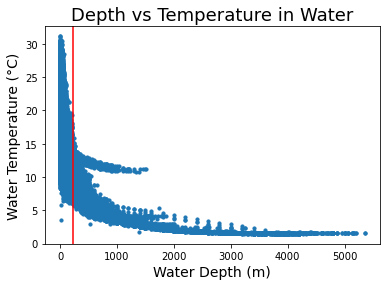

219.7340004355269

In [18]:
plt.scatter(df_bottle["Depthm"], df_bottle["T_degC"],s=10)
plt.xlabel('Water Depth (m)',fontsize=14)
plt.ylabel('Water Temperature (°C)',fontsize=14)
plt.title('Depth vs Temperature in Water',fontsize=18)
plt.axvline(x = df_bottle["Depthm"].mean(), color = 'r')
plt.show()

df_bottle["Depthm"].mean()

As depicted in the graph above, the relationship between water temperature is also influenced by water depth with clear polynomial behavior.

However, we can see 2 "fangs" the smaller one is probably offseted data from the actual measurement environment etc.. As a result, I tried to eliminate all values above the average water depth in order to clean the data and make it more reliable but it didn't work 

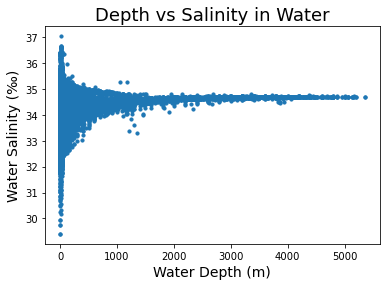

In [19]:
plt.scatter(df_bottle["Depthm"], df_bottle["Salnty"],s=10)
plt.xlabel('Water Depth (m)',fontsize=14)
plt.ylabel('Water Salinity (‰)',fontsize=14)
plt.title('Depth vs Salinity in Water',fontsize=18)
plt.show()


Creating a heatmap to check the data for multicollinearity.

In [20]:
target_variable = df_bottle.pop('T_degC')
df_bottle_train, df_bottle_test, y_bottle_train, y_bottle_test = train_test_split(df_bottle, target_variable, test_size= 0.3 , random_state= 1)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

# fit scaler to training and test data
df_bottle_train_scaled = scaler.fit_transform(df_bottle_train)
df_bottle_test_scaled = scaler.fit_transform(df_bottle_test)

y_bottle_train_scaled = scaler.fit_transform(np.asarray(y_bottle_train).reshape(-1, 1))
y_bottle_test_scaled = scaler.fit_transform(np.asarray(y_bottle_test).reshape(-1, 1))

# create a dataframe
df_bottle_train_scaled = pd.DataFrame(df_bottle_train_scaled, columns= df_bottle_train.columns)
df_bottle_test_scaled = pd.DataFrame(df_bottle_test_scaled, columns= df_bottle_test.columns)

In [22]:
df_bottle_train_scaled.describe()

,Depthm,Salnty,O2ml_L,STheta,R_PRES
count,462887.000000,462887.000000,462887.000000,462887.000000,462887.000000
mean,0.041039,0.580572,0.320046,0.680940,0.040505
std,0.057985,0.060318,0.193312,0.143080,0.057468
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.009157,0.534329,0.131776,0.559336,0.008978
50%,0.023360,0.583333,0.325234,0.705799,0.023085
75%,0.056064,0.626690,0.515888,0.799376,0.055332
max,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

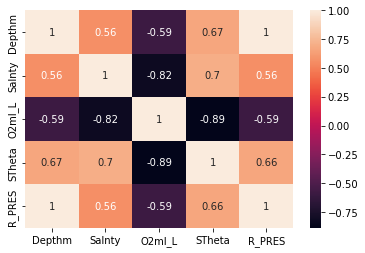

In [23]:
sns.heatmap(df_bottle_train_scaled.corr(), annot= True)


### Creating Model

In [24]:
from sklearn.linear_model import Ridge

# Initialize the model
model_ridge = Ridge()

# Training of the Ridge Regression model with the trainings data
model_ridge.fit(df_bottle_train_scaled, y_bottle_train_scaled)

# Testing the model with the unknown test-data using the predict method
ridge_pred = model_ridge.predict(df_bottle_test_scaled)

In [25]:
# R-squared score
print(r2_score(y_bottle_test_scaled, ridge_pred))

# Mean absolute error
print(mean_absolute_error(y_bottle_test_scaled, ridge_pred))

0.9805030822228783
0.015491581441785212


In [26]:
# Print the coefficients
coefficients = model_ridge.coef_
intercept = model_ridge.intercept_
features = df_bottle_train.columns

print("Intercept:", intercept)
i = 0
for feature in features:
    print(f"{feature}: {coefficients[0][i]}")
    i+=1

Intercept: [0.52805897]
Depthm: -0.2796420591519724
Salnty: 0.9084119115469668
O2ml_L: 0.05225601392344249
STheta: -1.0895286965243012
R_PRES: 0.004821835389416069


Cold water has a higher density than warm water. Water gets colder with depth because cold, salty ocean water sinks to the bottom of the ocean basins below the less dense warmer water near the surface.
SO THE INTERCEPT MAKES NO SENSE PROBABLY OVERFIT